In [1]:
import ee
import xarray as xr

In [2]:
import xee

In [3]:
# Trigger the authentication flow
ee.Authenticate()

# Initialize the Earth Engine library
ee.Initialize(project='satellite-modeling')

In [10]:
#Region gridded to 1KM
min_lon = -98.9 # Minimum longitude (should be less than max_lon)
max_lon = -88.3
#max_lon = -98.8  # Minimum latitude (should be less than max_lat)
min_lat = 28.6 # Maximum longitude (should be greater than min_lon)
max_lat = 33.4   # Maximum latitude (should be greater than min_lat)
#max_lat = 28.7

# Define the rectangle that encompasses Louisiana and Texas
bbox = ee.Geometry.Rectangle([-98.9, 28.6, -88.3, 33.4])


start_date = '2022-01-01T00:00'
end_date = '2022-01-01T23:59'  # Example: 1 day of hourly data

# List of climate variables to download from NLDAS
variables =['temperature', 'specific_humidity', 'pressure', 'wind_u', 'wind_v', 'longwave_radiation', 'convective_fraction', 'potential_energy', 'potential_evaporation', 'total_precipitation', 'shortwave_radiation']

# Load NLDAS hourly data and filter by region and date
dataset = ee.ImageCollection("NASA/NLDAS/FORA0125_H002") \
            .filterDate(start_date, end_date) \
            .filterBounds(bbox) \
            .select(variables)

In [19]:
ds = xr.open_dataset(dataset, engine='ee', crs='EPSG:4326', scale=0.01)

In [20]:
lat_min, lat_max = 28.6, 33.4  # Example latitude range
lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Filter the dataset based on the latitude and longitude bounds
ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

<xarray.Dataset> Size: 684GB
Dimensions:                (time: 24, lon: 36000, lat: 18000)
Coordinates:
  * time                   (time) datetime64[ns] 192B 2022-01-01 ... 2022-01-...
  * lon                    (lon) float64 288kB -180.0 -180.0 ... 180.0 180.0
  * lat                    (lat) float64 144kB -90.0 -89.98 ... 89.99 90.0
Data variables:
    temperature            (time, lon, lat) float32 62GB ...
    specific_humidity      (time, lon, lat) float32 62GB ...
    pressure               (time, lon, lat) float32 62GB ...
    wind_u                 (time, lon, lat) float32 62GB ...
    wind_v                 (time, lon, lat) float32 62GB ...
    longwave_radiation     (time, lon, lat) float32 62GB ...
    convective_fraction    (time, lon, lat) float32 62GB ...
    potential_energy       (time, lon, lat) float32 62GB ...
    potential_evaporation  (time, lon, lat) float32 62GB ...
    total_precipitation    (time, lon, lat) float32 62GB ...
    shortwave_radiation    (time, lon, lat) float32 62GB ...
Attributes: (12/19)
    date_range:               [283996800000, 1647648000000]
    description:              <p>Land Data Assimilation System (LDAS) combine...
    keywords:                 ['climate', 'evaporation', 'forcing', 'geophysi...
    period:                   0
    product_tags:             ['forcing', 'wind', 'temperature', 'humidity', ...
    provider:                 NASA GES DISC at NASA Goddard Space Flight Center
    ...                       ...
    visualization_0_bands:    temperature
    visualization_0_max:      40.0
    visualization_0_min:      -5.0
    visualization_0_name:     Temperature
    visualization_0_palette:  3d2bd8,4e86da,62c7d8,91ed90,e4f178,ed6a4c
    crs:                      EPSG:4326

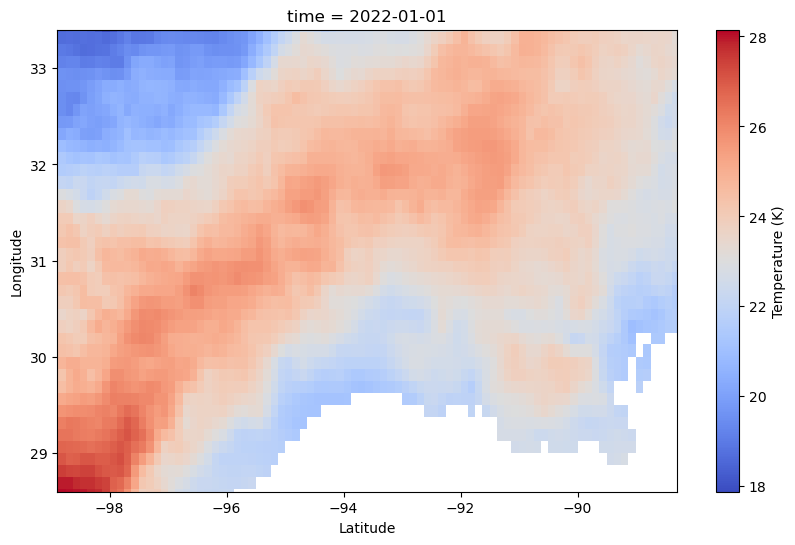

In [22]:
import matplotlib.pyplot as plt
# Define your latitude and longitude bounds
lat_min, lat_max = 28.6, 33.4  # Example latitude range
lon_min, lon_max = -98.9, -88.3  # Example longitude range

# Filter the dataset based on the latitude and longitude bounds
filtered_ds = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Select one hour of temperature data (e.g., the first timestamp)
hour_index = 0  # Change this to select a different hour if desired
temperature_data = filtered_ds['temperature'].isel(time=hour_index)

# Plot the data with switched axes
plt.figure(figsize=(10, 6))

# Plot with latitude on x-axis and longitude on y-axis
temperature_data.T.plot(
    cmap="coolwarm",  # Colormap for temperature visualization
    cbar_kwargs={'label': 'Temperature (K)'}  # Add color bar label
)

# Update axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()